<a href="https://colab.research.google.com/github/TrunnMosby/GSoC-RedHenLabs-Aztec-Glyph-Detection/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt

In [ ]:
import cv2
import matplotlib.pyplot as plt
import  os
import numpy as np

In [ ]:
base_models=tf.keras.applications.InceptionV3()

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=base_models.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
base_models.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
feat_extractor = Model(inputs=base_models.input, outputs=base_models.get_layer("avg_pool").output)
feat_extractor.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
__________________________________________________________________________________________________


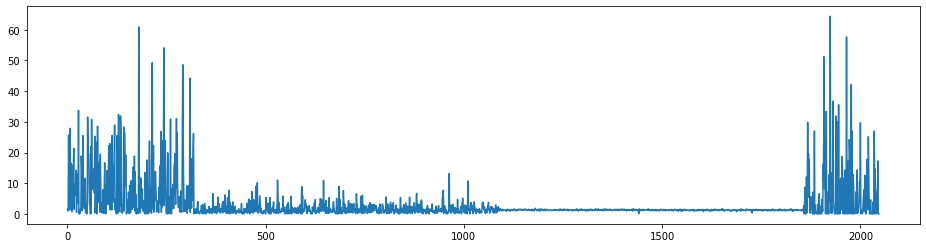

In [ ]:
img, x = load_image("/content/drive/MyDrive/Everything/Acapan20r.jpeg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = '/content/drive/MyDrive/Everything'
image_extensions = ['.jpg', '.png', '.jpeg']   
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 1255 images to analyze


In [ ]:
import time
tic = time.clock()
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


analyzing image 0 / 1255. Time: 0.0006 seconds.
analyzing image 500 / 1255. Time: 209.2623 seconds.
analyzing image 1000 / 1255. Time: 210.2151 seconds.
finished extracting features for 1255 images


In [ ]:
from scipy.spatial import distance

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(features[query_image_idx], feat) for feat in features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Names of the similar images:-
atl26rwaterFromAlhuexoyocan.jpg
Tlachco8rSIMPLEX.jpeg
Quecholac42r.jpeg
tlachtli8rballcourtSIMPLEXforTlachco.jpg
tlachtli36rballcourtSIMPLEXFromTlachco.png


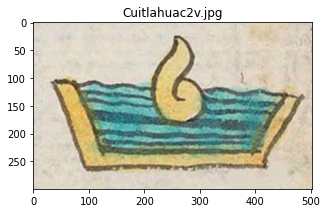

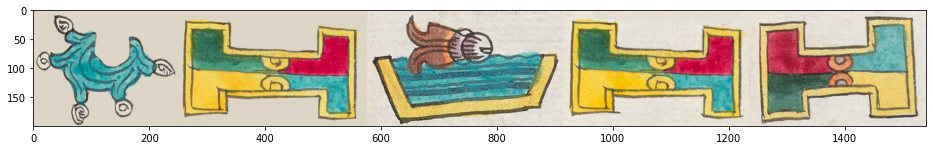

In [ ]:
query_image_idx = 1030
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Poctlan46rSIMPLEX.jpeg
poctli46rsmokeSIMPLEXForPoctlan.jpeg
xocotl55rhogplumtreeFromXocoyocan.png
Ocoyacac10r.jpeg
Coatzinco42r.jpeg


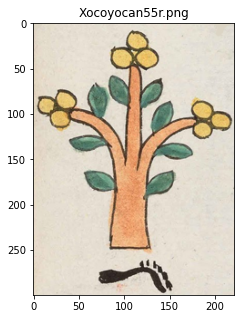

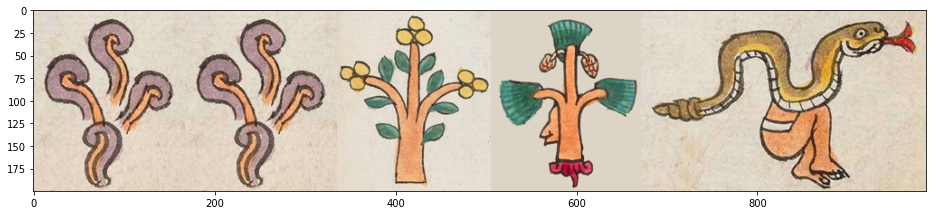

In [ ]:
query_image_idx = 1005
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
totolin7vturkeyhenFromTotolapan.jpg
mazatl13vdeerFromMazatlan.jpg
tecuacuilli06rstatueFromTepecuacuilco.jpeg
Tecpan5v.png
cuauhtli24veagleSAforCuauhtlan24v.jpeg


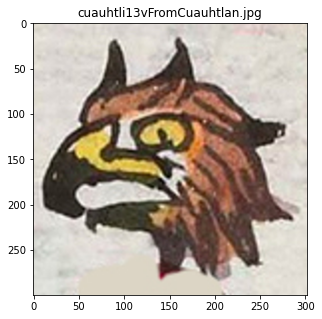

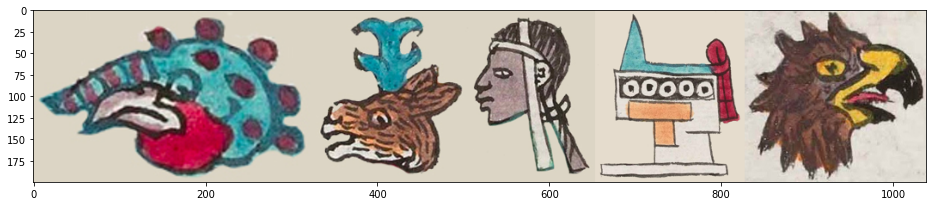

In [ ]:
query_image_idx = 1200
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
pechtli21vrug,foundationFromTepechpan.png
Tepechpan21v.jpeg
cuahuitl49rtreeFromMictlanCuauhtlan.jpeg
cuahuitl08rtreeFromCuauhtochco.jpg
Quetzalmacan28r.jpeg


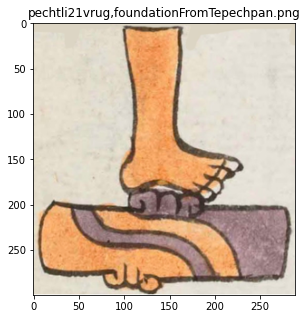

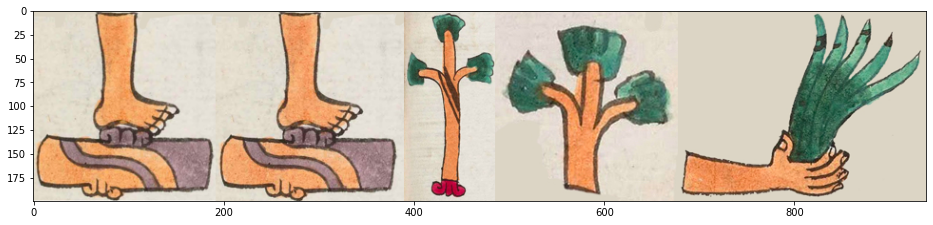

In [ ]:
query_image_idx = 900
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])